# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed.

In [11]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## K- Means

In [12]:
# Load data from input file
X = np.loadtxt('lab06_data.txt', delimiter=',')

Saving figure original_data


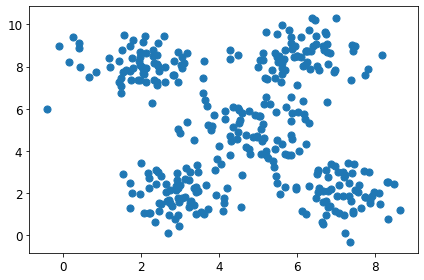

In [13]:
plt.scatter(X[:, 0], X[:, 1], s=50);
save_fig("original_data")
plt.show()

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

The kmeans instance preserves a copy of the labels of the instances it was trained on, available via the "labels_" instance variable.The five centroids can be accessed with the "cluster_centers_" variable.

In [15]:
print("kmeans.labels_:")
print(kmeans.labels_)
print("kmeans.cluster_centers_:")
print(kmeans.cluster_centers_)

# Check the value of y_kmeans here and what observation do you get? 
print(y_kmeans)
for label, y_kmean in zip(kmeans.labels_, y_kmeans):
    print(label == y_kmean)

kmeans.labels_:
[4 3 0 2 1 4 3 0 0 1 4 3 0 2 1 4 3 0 2 1 4 3 0 4 0 4 3 0 2 1 4 3 0 2 1 4 3
 0 2 1 4 3 0 2 1 4 3 0 2 1 4 3 0 2 1 4 3 0 2 1 4 3 0 2 1 4 3 0 2 1 4 3 0 2
 1 4 3 1 2 1 4 3 0 2 1 4 3 0 2 1 4 3 0 2 1 4 3 0 2 1 4 3 0 2 1 4 3 0 2 1 4
 3 0 2 1 4 3 3 2 1 4 3 0 2 1 4 3 0 2 1 4 3 0 2 1 4 3 0 2 1 4 3 0 2 1 4 3 0
 2 1 4 3 0 2 1 4 3 0 2 1 4 3 0 2 1 4 3 0 2 1 4 3 0 2 1 4 3 0 2 1 4 3 0 2 1
 4 3 0 2 1 4 3 0 2 1 4 3 0 2 1 4 3 0 2 1 4 3 0 2 1 4 3 0 2 1 4 3 0 2 1 4 3
 0 2 1 4 3 0 2 1 4 3 0 2 1 4 3 0 2 1 4 3 0 2 1 4 3 0 2 1 4 3 0 2 1 4 3 0 2
 1 4 3 0 2 1 4 3 0 2 1 4 3 0 2 1 4 1 0 2 1 4 3 0 2 1 4 3 0 2 1 4 3 0 2 1 4
 3 0 2 0 4 3 0 2 1 4 3 0 2 1 4 3 0 2 1 4 3 0 2 1 4 3 0 2 1 4 3 0 2 1 4 3 0
 2 1 4 3 0 2 1 4 3 0 2 1 4 3 0 2 1]
kmeans.cluster_centers_:
[[4.92605634 5.0184507 ]
 [6.10842857 8.58428571]
 [7.09588235 2.01735294]
 [1.98385714 8.04942857]
 [2.97253521 1.97267606]]
[4 3 0 2 1 4 3 0 0 1 4 3 0 2 1 4 3 0 2 1 4 3 0 4 0 4 3 0 2 1 4 3 0 2 1 4 3
 0 2 1 4 3 0 2 1 4 3 0 2 1 4 3 0 2 1 4 3 0 2 1 

Saving figure Kmeans_plot


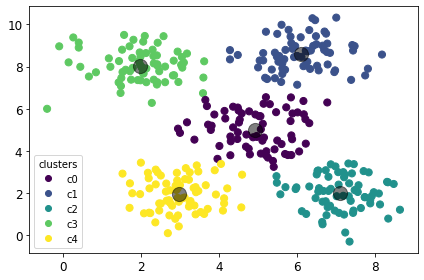

In [16]:
scatter = plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
lb = ['c0', 'c1', 'c2', 'c3', 'c4']
plt.legend(handles=scatter.legend_elements()[0], labels = lb, title="clusters")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200, alpha=0.5);
save_fig("Kmeans_plot")
plt.show()

In [17]:
# Assign new instances to the cluster whose centroid is closest:
X_new = np.array([[0, 2], [3.5, 6], [5, 9.5], [7, 2.5]])
kmeans.predict(X_new)

# Check which cluster the following instances belong to?
# (-1, 0.5), (6.5, 4.5), (2.2, 8.5) 
# Sample output:
# [0,2] belongs to cluster 4
# [3.5, 6] belongs to cluster 0

# Write your code here
kmeans.predict([[-1, 0.5], [6.5, 4.5], [2.2, 8.5]])

array([4, 0, 3], dtype=int32)

Saving figure user_Kmeans_plot


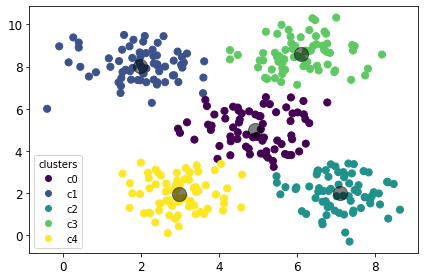

In [18]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=42):
    # Randomly choose the initial centroids
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) # axis = 0
                                for i in range(n_clusters)])
        
        # Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 5)

scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
lb = ['c0', 'c1', 'c2', 'c3', 'c4']
plt.legend(handles=scatter.legend_elements()[0], labels = lb, title="clusters")

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

save_fig("user_Kmeans_plot")
plt.show()

In [19]:
# Print the centroids found by the user defined KMeans function here and compare the results to the sklearn method.
for center, cluster_center in zip(centers, kmeans.cluster_centers_):
    print("user: %s, sklearn: %s"%(center, cluster_center))

user: [4.92605634 5.0184507 ], sklearn: [4.92605634 5.0184507 ]
user: [1.98385714 8.04942857], sklearn: [6.10842857 8.58428571]
user: [7.09588235 2.01735294], sklearn: [7.09588235 2.01735294]
user: [6.10842857 8.58428571], sklearn: [1.98385714 8.04942857]
user: [2.97253521 1.97267606], sklearn: [2.97253521 1.97267606]


Although the algorithm is guaranteed to converge, it may not converge to the right solution.

Saving figure local_optimum_plot


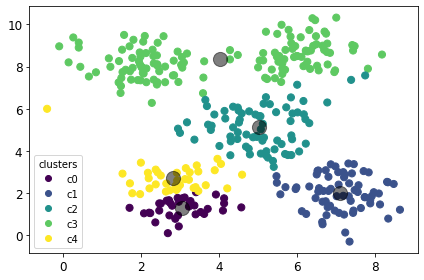

In [20]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # Randomly choose the initial centroids
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) # axis = 0
                                for i in range(n_clusters)])
        
        # Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 5)

scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
lb = ['c0', 'c1', 'c2', 'c3', 'c4']
plt.legend(handles=scatter.legend_elements()[0], labels = lb, title="clusters")

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
save_fig("local_optimum_plot")
plt.show()

## Centroid initialization methods
1. If you happen to know approximately where the centroids should be (e.g., if you ran another clustering algorithm earlier), then you can set the init hyperparameter to a NumPy array containing the list of centroids, and set n_init to 1:
```python
good_init = np.array([[5, 5], [2, 8], [7, 2], [6, 9], [3, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)
```
2. Another solution is to run the algorithm multiple times with different random initializations and keep the best solution. The number of random initializations is controlled by the n_init hyperparameter: by default, it is equal to 10. The performance can be evaluated by the metric "inertia" (cost). Inertia is the sum of the squared distances between each training instance and its closest centroid. The KMeans class runs the algorithm n_init times and keeps the model with the lowest inertia.
3. K-Means++ algorithm: It introduced a smarter initialization step that tends to select centroids that are distant from one another, and this improvement makes the K-Means algorithm much less likely to converge to a suboptimal solution. To set the initialization to K-Means++, simply set init="k-means++" (this is actually the default).

In [21]:
# The inertia and score values of the above model
print("inertia:" +str(kmeans.inertia_))
# The score() method returns the negative inertia. 
# A predictor's score() method must always respect the "_greater is better_" rule.
print("score:" +str(kmeans.score(X)))

inertia:433.80300829447276
score:-433.8030082944727


### Mini-Batch K-Means
Scikit-Learn also implements a variant of the K-Means algorithm that supports mini-batches. Mini-batch K-Means is much faster than regular K-Means. However, its performance is often lower (higher inertia), and it keeps degrading as k increases.

In [22]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)
minibatch_kmeans.inertia_

435.2937615194805

### Finding the optimal number of clusters
What if the number of clusters was set to a lower or greater value than 5?

Saving figure bad_n_clusters_plot


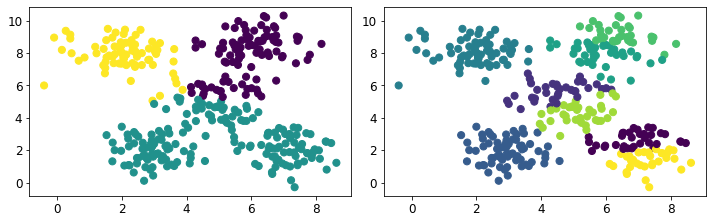

In [23]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k3.fit(X)
y_kmeans_k3 = kmeans_k3.predict(X)

kmeans_k8 = KMeans(n_clusters=8, random_state=42)
kmeans_k8.fit(X)
y_kmeans_k8 = kmeans_k8.predict(X)

plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_k3, s=50, cmap='viridis')

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_k8, s=50, cmap='viridis')
save_fig("bad_n_clusters_plot")
plt.show()

In [24]:
# Check the inertia values
print("cluster = 3 -- " + str(kmeans_k3.inertia_))
print("cluster = 8 -- " + str(kmeans_k8.inertia_))

cluster = 3 -- 1334.7535407513815
cluster = 8 -- 324.9987109083069


We cannot simply take the value of K that minimizes the inertia, since it keeps getting lower as we increase K. However, we can plot the inertia as a function of K and analyze the resulting curve:

In [25]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

Saving figure inertia_vs_K_plot


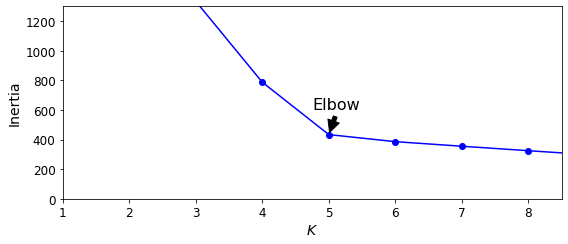

In [26]:
# The elbow method
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$K$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(5, inertias[4]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
save_fig("inertia_vs_K_plot")
plt.show()

As you can see, there is an elbow at $K=5$, which means that less clusters than that would be bad, and more clusters would not help much and might cut clusters in half. So $K=5$ is a pretty good choice. 

Another approach is to look at the _silhouette score_, which is the mean _silhouette coefficient_ over all the instances. An instance's silhouette coefficient is equal to $(b - a)/\max(a, b)$ where $a$ is the mean distance to the other instances in the same cluster (it is the _mean intra-cluster distance_), and $b$ is the _mean nearest-cluster distance_, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes $b$, excluding the instance's own cluster). The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

Let's plot the silhouette score as a function of $K$:

In [27]:
from sklearn.metrics import silhouette_score
# Get the silhouette score for the current model
silhouette_score(X, kmeans.labels_)
# Get the silhouette score for different models with different K
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

Saving figure silhouette_score_vs_k_plot


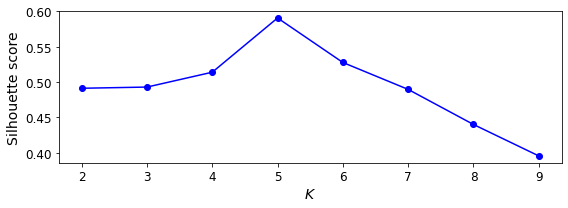

In [28]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$K$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
save_fig("silhouette_score_vs_k_plot")
plt.show()

### Using clustering for image segmentation
Image segmentation is the task of partitioning an image into multiple segments. We are going to do color segmentation here. We will simply assign pixels to the same segment if they have a similar color.

In [29]:
from matplotlib.image import imread
image = imread("flower.jpeg")
image.shape

(667, 500, 3)

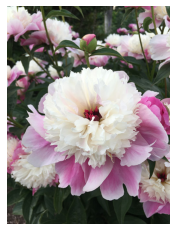

In [30]:
plt.imshow(image)
plt.axis('off')
plt.show()

The image is represented as a 3D array. The first dimension’s size is the height; the second is the width; and the third is the number of color channels, in this case red, green, and blue (RGB). In other words, for each pixel there is a 3D vector containing the intensities of red, green, and blue, each between 0 and 255. <br>
The following code reshapes the array to get a long list of RGB colors, then it clusters these colors using K-Means:

In [31]:
image = image/255.0 # convert to 0...1 scale
X = image.reshape(-1, 3)
X.shape

(333500, 3)

In [32]:
kmeans = KMeans(n_clusters = 16)
kmeans.fit(X)
new_colors = kmeans.cluster_centers_[kmeans.predict(X)]
new_colors = new_colors.reshape(image.shape)
%timeit kmeans.fit(X)

6.26 s ± 528 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [33]:
# Use Mini-Batch K-Means to solve the same problem.
# Write your code here
minibatch = MiniBatchKMeans(n_clusters = 16)
minibatch.fit(X)
minibatch_colors = minibatch.cluster_centers_[minibatch.predict(X)]
minibatch_colors = minibatch_colors.reshape(image.shape)
%timeit minibatch.fit(X)

348 ms ± 119 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Saving figure image_segmentation_diagram


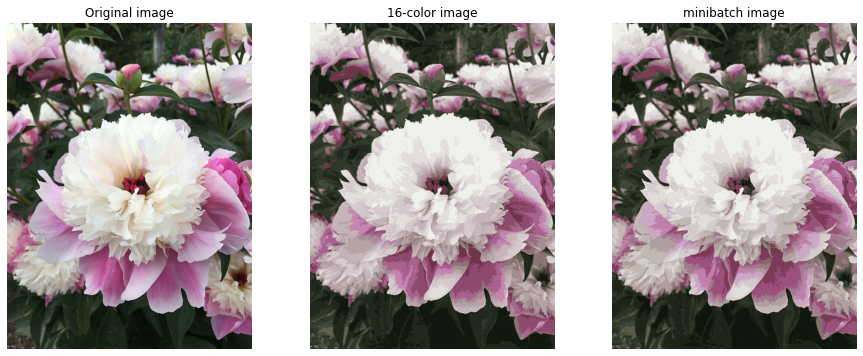

In [34]:
plt.figure(figsize=(16,6))
plt.subplots_adjust(wspace=0.05)
plt.subplot(131)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

plt.subplot(132)
plt.imshow(new_colors)
plt.title("16-color image")
plt.axis('off')

plt.subplot(133)
plt.imshow(minibatch_colors)
plt.title("minibatch image")
plt.axis('off')

save_fig('image_segmentation_diagram', tight_layout=False)
plt.show()

## Run the program and complete the following exercises. (20 points)
1.  For the "lab06_data.txt" KMeans example:
    - (2 points) check the value of "y_kmeans". Comparing to the model variables, What observation do you get?  
    - (3 points) Check which cluster the following instances belong to? (-1, 0.5), (6.5, 4.5), (2.2, 8.5) 
    - (2 points) Print the centroids found by the user defined KMeans algorithm. Comparing to the sklearn KMeans method result, do they converge to the same centroids? 
    - (3 points) When Kmeans algorithm does not converge to the right solution, what do you think it converges to? Analyze the reasons. (What does it depend on?)
2. (3 points) We cannot simply choose the value of K that minimizes the inertia, since it keeps getting lower as we increase K. Anylyze the reason.   
3. For the image segmentation example,  
    - (2 points) Observe the data from the original picture and calulate possible color options in the original picture. 
    - (1 points) What does the following statement do?<br>
     ```python X = image.reshape(-1, 3) ```
    - (3 points) Use Mini-Batch K-Means to solve the same problem. Use "%timeit" function call to compare the time efficiency of the two algorithms.
5. (1 points) Create a new Markdown field at the end of this file and put your answers in this field. Submit this file to the Blackboard. 

<ol>
    <li>
        <ul> 
            <li>When comparing the model variables to the prediction set, the labels line up with complete accuracy, no instance of false values. This should not be a surprise though since the same values used in prediction were used for fitting - there was no train/test aspect to it. The centroid values line up well with the classes, but there are enoguh borderline values that recentering with additional data could change the centroids enough to flip some predicted label values.</li><br>
            <li>In the order of (-1, 0.5), (6.5, 4.5), (2.2, 8.5), their respective categories are 4, 0, 3</li><br>
            <li>They do converge on the same centroids. The ordering of the centroids is slightly different ordering in the centroids as seen in the printing loop added in to show the centroid values after the user defined kmeans plot.</li><br>
            <li>When the kmeans algorithm does not find the correct solution, I believe it may be converging to a local minimum based off of the initialization of the clusters. While there are additions of the kmeans algorithm that reduce the chances of initialization based issues (kmeans++) there could still exist conditions where the initialization determines the clusters. One example would be data that is distributed approximately uniformly, there will still be spots that are not quite uniform but close enough that they could be classified as 2 different labels on separate intializations. </li><br>
        </ul>
    </li>
    <li>We cannot continually increase the K value to minimize inertia since it will always continue decreasing regardless of the impact on accuracy for the classification. Since inertia is a sum of squared distance to centroid, each new centroid will cause a reduced sum of ditances since a certain number of points will have reduced distance. This can lead to the segmentation of clusters as seen in the bad_n plots, and in an extreme example where the number of clusters approach the number of datapoints, technically the inertia approaches zero but the quality of information that the clusters provide also approaches zero. This does not mean that we pick an arbitrarily low number either, as that also poses the issue of grouping multiple clusters into one despite there being potential for more visible division. This is why something like the elbow method can be applied to find the point where additional clusters still provide good information but also identify the point of diminishing return.</li><br>
    <li>
        <ul>
            <li>The number of color possibilities in an RGB pixel with 256 levels per channnel would be ${256^3 = 16777216}$. There are also ${667 * 500 = 333500}$ pixels, which means there are 333500 points of data with 16777216 possible values at any of those points </li><br>
            <li>The reshape(-1, 3) call reshapes the image from an [x, y] coordinate that then contained [r,g,b] values to a list of pixels. Essentially it takes the 2 dimension that locate a pixel, and just extracts that pixel value so that it's value can be accessed with less dimension.</li><br>
            <li>The minibatch clustering time completed in 1/6th the time of kmeans with 1/2 the standard deviation.</li>
        </ul>
    </li>
</ol>